In [ ]:
#Pada bagian ini saya memuat seluruh library yang diperlukan untuk analisis data saham dan pemodelan time series menggunakan SARIMA.Kemudian, dataset saham Coca-Cola yang berada di folder Downloads dibaca dan diubah format tanggalnya agar dapat diproses sebagai time series.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Membaca dataset saham dari folder Downloads
data = pd.read_csv("/home/zurich/Downloads/ko.us.txt")

# Mengubah kolom tanggal menjadi format datetime
data["Date"] = pd.to_datetime(data["Date"])

# Menjadikan kolom Date sebagai index agar bisa diproses sebagai time series
data.set_index("Date", inplace=True)

# Menampilkan beberapa baris teratas
data.head()


,Open,High,Low,Close,Volume,OpenInt
Date,,,,,,
1970-01-02,0.6975,0.6975,0.6934,0.6975,1447529,0
1970-01-05,0.6975,0.6975,0.6853,0.6894,1070932,0
1970-01-06,0.6894,0.6975,0.6853,0.6934,1529907,0
1970-01-07,0.6934,0.7016,0.6894,0.6975,1341607,0
1970-01-08,0.6975,0.7056,0.6934,0.7016,1376917,0


In [7]:
# Melihat struktur dan tipe data
data.info()
# Mengecek apakah ada nilai yang hilang
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12075 entries, 1970-01-02 to 2017-11-10
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Open     12075 non-null  float64
 1   High     12075 non-null  float64
 2   Low      12075 non-null  float64
 3   Close    12075 non-null  float64
 4   Volume   12075 non-null  int64  
 5   OpenInt  12075 non-null  int64  
 6   Day      12075 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 754.7 KB


Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Day        0
dtype: int64

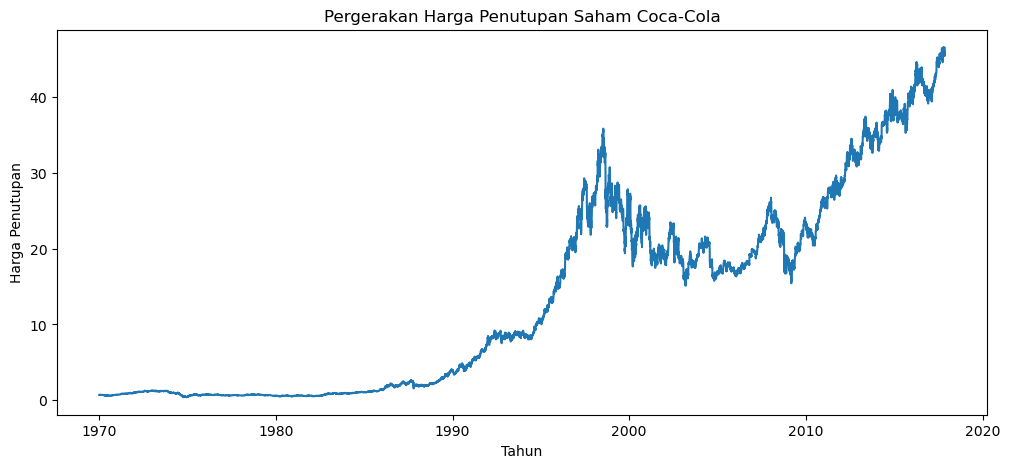

In [9]:
#Visualisasi Harga Penutupan
plt.figure(figsize=(12,5))
plt.plot(data["Close"])
plt.title("Pergerakan Harga Penutupan Saham Coca-Cola")
plt.xlabel("Tahun")
plt.ylabel("Harga Penutupan")
plt.show()

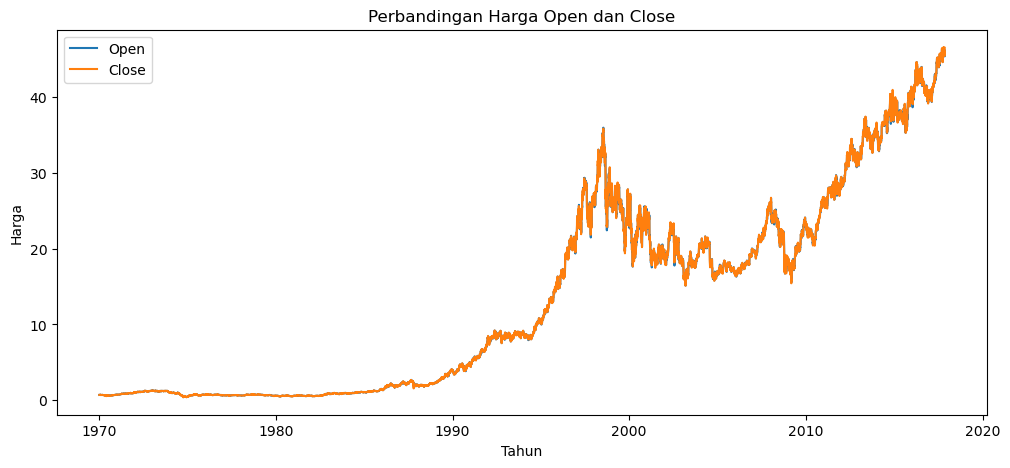

In [12]:
#Visualisasi Harga Open Vs Harga Close
plt.figure(figsize=(12,5))
plt.plot(data["Open"], label="Open")
plt.plot(data["Close"], label="Close")
plt.title("Perbandingan Harga Open dan Close")
plt.xlabel("Tahun")
plt.ylabel("Harga")
plt.legend()
plt.show()

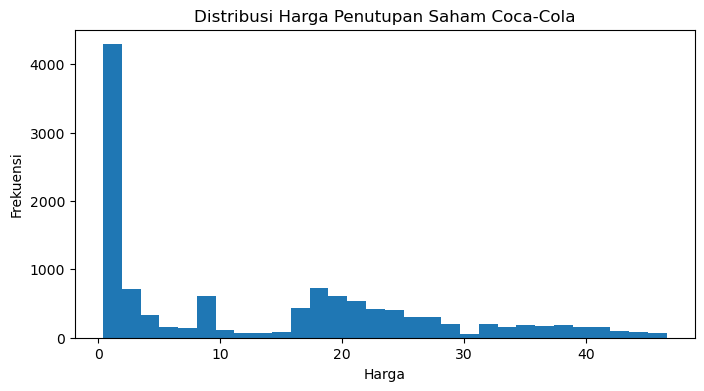

In [14]:
#Distribusi Harga Penutupan
plt.figure(figsize=(8,4))
plt.hist(data["Close"], bins=30)
plt.title("Distribusi Harga Penutupan Saham Coca-Cola")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()


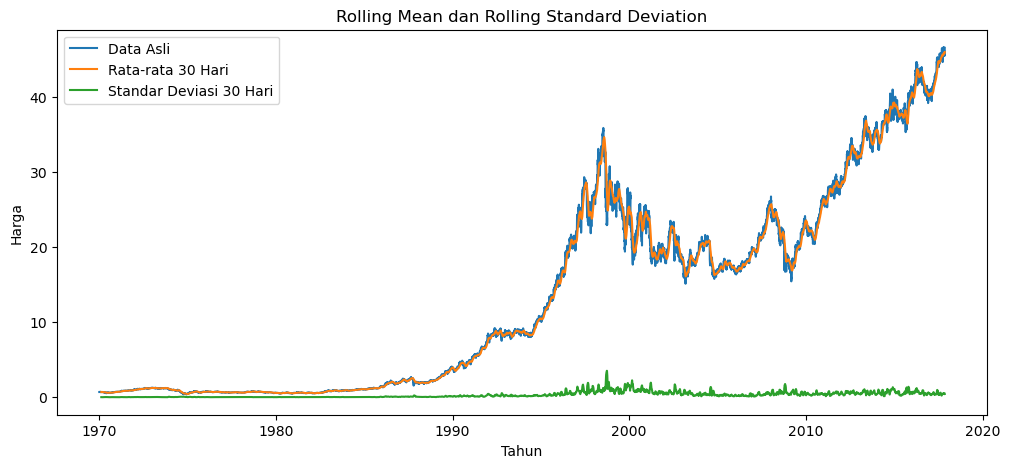

In [17]:
#Rolling Mean & Rolling STD
rolling_mean = data["Close"].rolling(window=30).mean()
rolling_std  = data["Close"].rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(data["Close"], label="Data Asli")
plt.plot(rolling_mean, label="Rata-rata 30 Hari")
plt.plot(rolling_std, label="Standar Deviasi 30 Hari")
plt.title("Rolling Mean dan Rolling Standard Deviation")
plt.xlabel("Tahun")
plt.ylabel("Harga")
plt.legend()
plt.show()

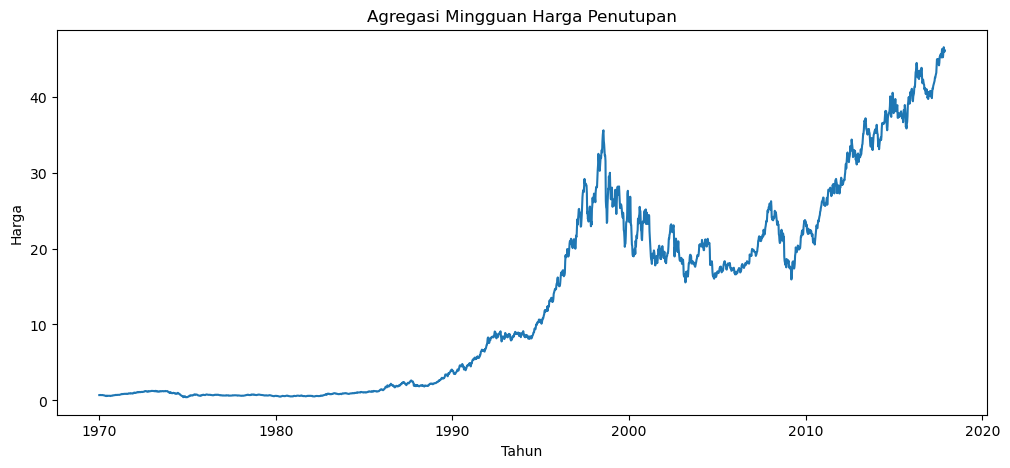

In [18]:
#Aggregasi Mingguan
data_mingguan = data["Close"].resample("W").mean()

plt.figure(figsize=(12,5))
plt.plot(data_mingguan)
plt.title("Agregasi Mingguan Harga Penutupan")
plt.xlabel("Tahun")
plt.ylabel("Harga")
plt.show()


/tmp/ipykernel_7390/1055270197.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_bulanan = data["Close"].resample("M").mean()


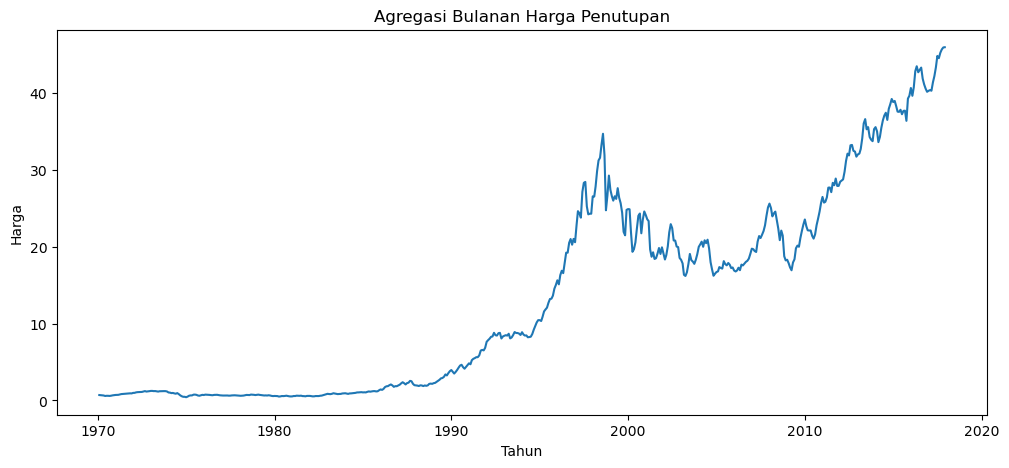

In [19]:
#Aggregasi Bulanan
data_bulanan = data["Close"].resample("M").mean()

plt.figure(figsize=(12,5))
plt.plot(data_bulanan)
plt.title("Agregasi Bulanan Harga Penutupan")
plt.xlabel("Tahun")
plt.ylabel("Harga")
plt.show()

/tmp/ipykernel_7390/427244628.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  data_tahunan = data["Close"].resample("Y").mean()


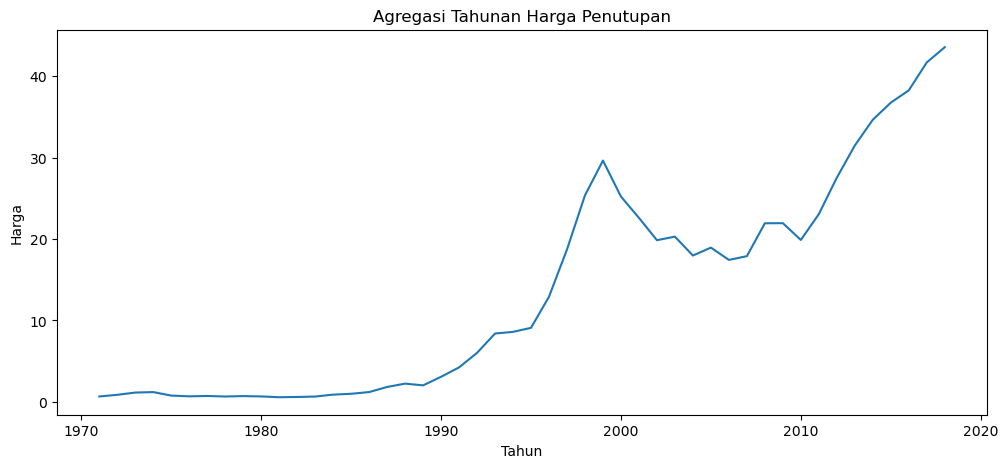

In [20]:
#Aggregasi Tahuan
data_tahunan = data["Close"].resample("Y").mean()

plt.figure(figsize=(12,5))
plt.plot(data_tahunan)
plt.title("Agregasi Tahunan Harga Penutupan")
plt.xlabel("Tahun")
plt.ylabel("Harga")
plt.show()

In [27]:
import warnings
warnings.filterwarnings("ignore") 
model = SARIMAX(
    data["Close"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
hasil_model = model.fit()

print(hasil_model.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                12075
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 268.187
Date:                            Tue, 11 Nov 2025   AIC                           -526.374
Time:                                    11:33:03   BIC                           -489.385
Sample:                                         0   HQIC                          -513.969
                                          - 12075                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5710      0.200     -2.849      0.004      -0.964      -0.178
ma.L1          0.5841      0.198   

In [32]:
#Prediksi 5 periode Kedepan
prediksi = hasil_model.forecast(steps=5)
prediksi

12075    46.538001
12076    46.530345
12077    46.519747
12078    46.534391
12079    46.543884
Name: predicted_mean, dtype: float64

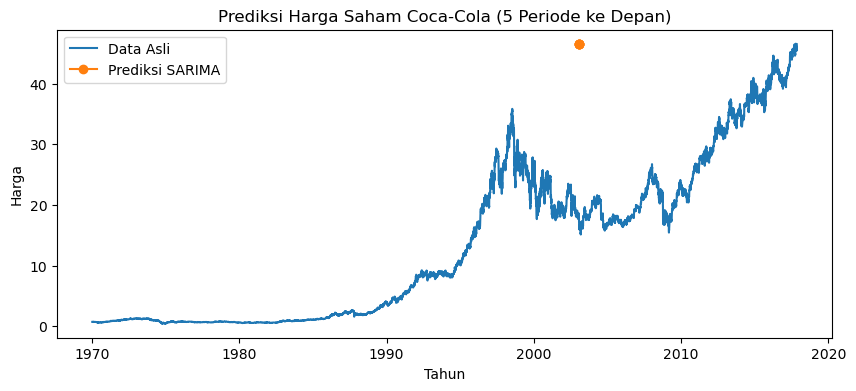

In [30]:
#Visualisasi Hasil Prediksi
plt.figure(figsize=(10,4))
plt.plot(data["Close"], label="Data Asli")
plt.plot(prediksi, label="Prediksi SARIMA", marker="o")
plt.title("Prediksi Harga Saham Coca-Cola (5 Periode ke Depan)")
plt.xlabel("Tahun")
plt.ylabel("Harga")
plt.legend()
plt.show()